(32000,)


Text(0.5, 1.05, 'MFCC')

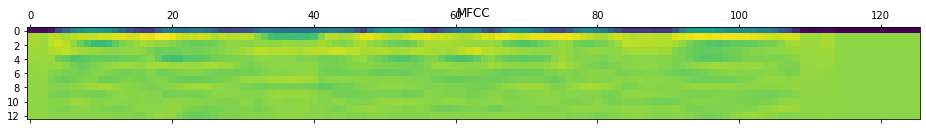

In [6]:
%matplotlib inline
import librosa 
import matplotlib.pyplot as plt
import numpy as np

path=r'D:\NLP\dataset\语音情感\test.wav'

y,sr = librosa.load(path,sr=None)

def normalizeVoiceLen(y,normalizedLen):
    nframes=len(y)
    y = np.reshape(y,[nframes,1]).T
    #归一化音频长度为2s,32000数据点
    if(nframes<normalizedLen):
        res=normalizedLen-nframes
        res_data=np.zeros([1,res],dtype=np.float32)
        y = np.reshape(y,[nframes,1]).T
        y=np.c_[y,res_data]
    else:
        y=y[:,0:normalizedLen]
    return y[0]

def getNearestLen(framelength,sr):
    framesize = framelength*sr  
    #找到与当前framesize最接近的2的正整数次方
    nfftdict = {}
    lists = [32,64,128,256,512,1024]
    for i in lists:
        nfftdict[i] = abs(framesize - i)
    sortlist = sorted(nfftdict.items(), key=lambda x: x[1])#按与当前framesize差值升序排列
    framesize = int(sortlist[0][0])#取最接近当前framesize的那个2的正整数次方值为新的framesize
    return framesize


VOICE_LEN=32000
#获得N_FFT的长度
N_FFT=getNearestLen(0.25,sr)
y=normalizeVoiceLen(y,VOICE_LEN)

print(y.shape)

mfcc_data=librosa.feature.mfcc(y=y, sr=sr,n_mfcc=13,n_fft=N_FFT,hop_length=int(N_FFT/4))



# 画出特征图，将MFCC可视化。转置矩阵，使得时域是水平的
plt.matshow(mfcc_data)
plt.title('MFCC')

In [2]:
import numpy as np

feature=np.mean(mfcc_data,axis=0)
print(feature)

[-36.88888  -37.408226 -38.362297 -38.147343 -33.237034 -30.82786
 -27.770071 -27.591228 -27.137817 -27.610624 -28.577263 -30.663658
 -28.285622 -28.694885 -33.899254 -37.893265 -36.107132 -34.55316
 -29.517544 -27.3554   -30.136808 -37.82916  -39.780823 -37.905247
 -36.299164 -38.103085 -39.862656 -40.09423  -40.422215 -39.433224
 -35.29545  -36.001865 -32.019707 -28.168617 -27.935057 -29.403055
 -29.31533  -28.492239 -29.504631 -28.950142 -30.769835 -30.120365
 -27.160715 -28.607983 -28.94817  -29.45197  -27.373596 -29.156961
 -21.719095 -18.233105 -20.423275 -25.650148 -27.492765 -30.555763
 -25.943575 -24.344149 -28.832094 -36.53229  -34.023254 -34.110195
 -32.704464 -29.753078 -27.25409  -27.548374 -30.964212 -32.53454
 -29.755484 -24.729675 -23.894003 -26.667002 -27.957075 -29.51382
 -29.505642 -31.251986 -32.36909  -26.70541  -25.07154  -23.616547
 -21.72581  -21.855389 -25.150938 -31.95644  -33.84981  -32.93574
 -34.064903 -33.544827 -31.391222 -31.812527 -36.10337  -38.34206
 

In [3]:
#提取特征
import os
import pickle

counter=0



fileDirCASIA = r'D:\NLP\dataset\语音情感\CASIA database'
fileDir_RAVDESS_SAVEE=r'D:\NLP\dataset\语音情感\Audio_Speech_RAVDESS'


mfccs={}
mfccs['angry']=[]
mfccs['fear']=[]
mfccs['happy']=[]
mfccs['neutral']=[]
mfccs['sad']=[]
mfccs['surprise']=[]
mfccs['disgust']=[]

listdir=os.listdir(fileDirCASIA)

for persondir in listdir:
    if(not r'.' in persondir):
        emotionDirName=os.path.join(fileDirCASIA,persondir)
        emotiondir=os.listdir(emotionDirName)
        for ed in emotiondir:
            if(not r'.' in ed):
                filesDirName=os.path.join(emotionDirName,ed)
                files=os.listdir(filesDirName)
                for fileName in files:
                    if(fileName[-3:]=='wav'):
                        counter+=1
                        fn=os.path.join(filesDirName,fileName)
                        print(str(counter)+fn)
                        y,sr = librosa.load(fn,sr=None)
                        y=normalizeVoiceLen(y,VOICE_LEN)#归一化长度
                        mfcc_data=librosa.feature.mfcc(y=y, sr=sr,n_mfcc=13,n_fft=N_FFT,hop_length=int(N_FFT/4))
                        feature=np.mean(mfcc_data,axis=0)
                        mfccs[ed].append(feature.tolist())
'''
                        
listdir=os.listdir(fileDir_RAVDESS_SAVEE)
for fn in listdir:
    counter+=1
    filename=os.path.join(fileDir_RAVDESS_SAVEE,fn)
    print(str(counter)+filename)
    
    y,sr = librosa.load(filename,sr=None)
    y=normalizeVoiceLen(y,VOICE_LEN)#归一化长度
    mfcc_data=librosa.feature.mfcc(y=y, sr=sr,n_mfcc=13,n_fft=N_FFT,hop_length=int(N_FFT/4))
    feature=np.mean(mfcc_data,axis=0)
    
    if(fn[6:8]=='01'):
        mfccs['neutral'].append(feature.tolist())
    elif(fn[6:8]=='02'):
        mfccs['neutral'].append(feature.tolist())
    elif(fn[6:8]=='03'):
        mfccs['happy'].append(feature.tolist())
    elif(fn[6:8]=='04'):
        mfccs['sad'].append(feature.tolist())
    elif(fn[6:8]=='05'):
        mfccs['angry'].append(feature.tolist())
    elif(fn[6:8]=='06'):
        mfccs['fear'].append(feature.tolist())
    elif(fn[6:8]=='07'):
        mfccs['disgust'].append(feature.tolist())
    elif(fn[6:8]=='08'):
        mfccs['surprise'].append(feature.tolist())
    elif(fn[0]=='a'):
        mfccs['angry'].append(feature.tolist())
    elif(fn[0]=='d'):
        mfccs['disgust'].append(feature.tolist())
    elif(fn[0]=='f'):
        mfccs['fear'].append(feature.tolist())
    elif(fn[0]=='h'):
        mfccs['happy'].append(feature.tolist())
    elif(fn[0]=='n'):
        mfccs['neutral'].append(feature.tolist())
    elif(fn[:2]=='sa'):
        mfccs['sad'].append(feature.tolist())
    elif(fn[:2]=='su'):
        mfccs['surprise'].append(feature.tolist())                 
'''         
with open('mfcc_feature_dict.pkl', 'wb') as f:
    pickle.dump(mfccs, f)

#with open(''mfcc_feature_dict.pkl', 'rb') as f:
#    return pickle.load(f)

1D:\NLP\dataset\语音情感\CASIA database\liuchanhg\angry\201.wav
2D:\NLP\dataset\语音情感\CASIA database\liuchanhg\angry\202.wav
3D:\NLP\dataset\语音情感\CASIA database\liuchanhg\angry\203.wav
4D:\NLP\dataset\语音情感\CASIA database\liuchanhg\angry\204.wav
5D:\NLP\dataset\语音情感\CASIA database\liuchanhg\angry\205.wav
6D:\NLP\dataset\语音情感\CASIA database\liuchanhg\angry\206.wav
7D:\NLP\dataset\语音情感\CASIA database\liuchanhg\angry\207.wav
8D:\NLP\dataset\语音情感\CASIA database\liuchanhg\angry\208.wav
9D:\NLP\dataset\语音情感\CASIA database\liuchanhg\angry\209.wav
10D:\NLP\dataset\语音情感\CASIA database\liuchanhg\angry\210.wav
11D:\NLP\dataset\语音情感\CASIA database\liuchanhg\angry\211.wav
12D:\NLP\dataset\语音情感\CASIA database\liuchanhg\angry\212.wav
13D:\NLP\dataset\语音情感\CASIA database\liuchanhg\angry\213.wav
14D:\NLP\dataset\语音情感\CASIA database\liuchanhg\angry\214.wav
15D:\NLP\dataset\语音情感\CASIA database\liuchanhg\angry\215.wav
16D:\NLP\dataset\语音情感\CASIA database\liuchanhg\angry\216.wav
17D:\NLP\dataset\语音情感\CASIA datab

160D:\NLP\dataset\语音情感\CASIA database\liuchanhg\neutral\210.wav
161D:\NLP\dataset\语音情感\CASIA database\liuchanhg\neutral\211.wav
162D:\NLP\dataset\语音情感\CASIA database\liuchanhg\neutral\212.wav
163D:\NLP\dataset\语音情感\CASIA database\liuchanhg\neutral\213.wav
164D:\NLP\dataset\语音情感\CASIA database\liuchanhg\neutral\214.wav
165D:\NLP\dataset\语音情感\CASIA database\liuchanhg\neutral\215.wav
166D:\NLP\dataset\语音情感\CASIA database\liuchanhg\neutral\216.wav
167D:\NLP\dataset\语音情感\CASIA database\liuchanhg\neutral\217.wav
168D:\NLP\dataset\语音情感\CASIA database\liuchanhg\neutral\218.wav
169D:\NLP\dataset\语音情感\CASIA database\liuchanhg\neutral\219.wav
170D:\NLP\dataset\语音情感\CASIA database\liuchanhg\neutral\220.wav
171D:\NLP\dataset\语音情感\CASIA database\liuchanhg\neutral\221.wav
172D:\NLP\dataset\语音情感\CASIA database\liuchanhg\neutral\222.wav
173D:\NLP\dataset\语音情感\CASIA database\liuchanhg\neutral\223.wav
174D:\NLP\dataset\语音情感\CASIA database\liuchanhg\neutral\224.wav
175D:\NLP\dataset\语音情感\CASIA database\li

444D:\NLP\dataset\语音情感\CASIA database\wangzhe\happy\244.wav
445D:\NLP\dataset\语音情感\CASIA database\wangzhe\happy\245.wav
446D:\NLP\dataset\语音情感\CASIA database\wangzhe\happy\246.wav
447D:\NLP\dataset\语音情感\CASIA database\wangzhe\happy\247.wav
448D:\NLP\dataset\语音情感\CASIA database\wangzhe\happy\248.wav
449D:\NLP\dataset\语音情感\CASIA database\wangzhe\happy\249.wav
450D:\NLP\dataset\语音情感\CASIA database\wangzhe\happy\250.wav
451D:\NLP\dataset\语音情感\CASIA database\wangzhe\neutral\201.wav
452D:\NLP\dataset\语音情感\CASIA database\wangzhe\neutral\202.wav
453D:\NLP\dataset\语音情感\CASIA database\wangzhe\neutral\203.wav
454D:\NLP\dataset\语音情感\CASIA database\wangzhe\neutral\204.wav
455D:\NLP\dataset\语音情感\CASIA database\wangzhe\neutral\205.wav
456D:\NLP\dataset\语音情感\CASIA database\wangzhe\neutral\206.wav
457D:\NLP\dataset\语音情感\CASIA database\wangzhe\neutral\207.wav
458D:\NLP\dataset\语音情感\CASIA database\wangzhe\neutral\208.wav
459D:\NLP\dataset\语音情感\CASIA database\wangzhe\neutral\209.wav
460D:\NLP\dataset\语音情感

604D:\NLP\dataset\语音情感\CASIA database\zhaoquanyin\angry\204.wav
605D:\NLP\dataset\语音情感\CASIA database\zhaoquanyin\angry\205.wav
606D:\NLP\dataset\语音情感\CASIA database\zhaoquanyin\angry\206.wav
607D:\NLP\dataset\语音情感\CASIA database\zhaoquanyin\angry\207.wav
608D:\NLP\dataset\语音情感\CASIA database\zhaoquanyin\angry\208.wav
609D:\NLP\dataset\语音情感\CASIA database\zhaoquanyin\angry\209.wav
610D:\NLP\dataset\语音情感\CASIA database\zhaoquanyin\angry\210.wav
611D:\NLP\dataset\语音情感\CASIA database\zhaoquanyin\angry\211.wav
612D:\NLP\dataset\语音情感\CASIA database\zhaoquanyin\angry\212.wav
613D:\NLP\dataset\语音情感\CASIA database\zhaoquanyin\angry\213.wav
614D:\NLP\dataset\语音情感\CASIA database\zhaoquanyin\angry\214.wav
615D:\NLP\dataset\语音情感\CASIA database\zhaoquanyin\angry\215.wav
616D:\NLP\dataset\语音情感\CASIA database\zhaoquanyin\angry\216.wav
617D:\NLP\dataset\语音情感\CASIA database\zhaoquanyin\angry\217.wav
618D:\NLP\dataset\语音情感\CASIA database\zhaoquanyin\angry\218.wav
619D:\NLP\dataset\语音情感\CASIA database\zh

750D:\NLP\dataset\语音情感\CASIA database\zhaoquanyin\happy\250.wav
751D:\NLP\dataset\语音情感\CASIA database\zhaoquanyin\neutral\201.wav
752D:\NLP\dataset\语音情感\CASIA database\zhaoquanyin\neutral\202.wav
753D:\NLP\dataset\语音情感\CASIA database\zhaoquanyin\neutral\203.wav
754D:\NLP\dataset\语音情感\CASIA database\zhaoquanyin\neutral\204.wav
755D:\NLP\dataset\语音情感\CASIA database\zhaoquanyin\neutral\205.wav
756D:\NLP\dataset\语音情感\CASIA database\zhaoquanyin\neutral\206.wav
757D:\NLP\dataset\语音情感\CASIA database\zhaoquanyin\neutral\207.wav
758D:\NLP\dataset\语音情感\CASIA database\zhaoquanyin\neutral\208.wav
759D:\NLP\dataset\语音情感\CASIA database\zhaoquanyin\neutral\209.wav
760D:\NLP\dataset\语音情感\CASIA database\zhaoquanyin\neutral\210.wav
761D:\NLP\dataset\语音情感\CASIA database\zhaoquanyin\neutral\211.wav
762D:\NLP\dataset\语音情感\CASIA database\zhaoquanyin\neutral\212.wav
763D:\NLP\dataset\语音情感\CASIA database\zhaoquanyin\neutral\213.wav
764D:\NLP\dataset\语音情感\CASIA database\zhaoquanyin\neutral\214.wav
765D:\NLP\da

1029D:\NLP\dataset\语音情感\CASIA database\ZhaoZuoxiang\happy\229.wav
1030D:\NLP\dataset\语音情感\CASIA database\ZhaoZuoxiang\happy\230.wav
1031D:\NLP\dataset\语音情感\CASIA database\ZhaoZuoxiang\happy\231.wav
1032D:\NLP\dataset\语音情感\CASIA database\ZhaoZuoxiang\happy\232.wav
1033D:\NLP\dataset\语音情感\CASIA database\ZhaoZuoxiang\happy\233.wav
1034D:\NLP\dataset\语音情感\CASIA database\ZhaoZuoxiang\happy\234.wav
1035D:\NLP\dataset\语音情感\CASIA database\ZhaoZuoxiang\happy\235.wav
1036D:\NLP\dataset\语音情感\CASIA database\ZhaoZuoxiang\happy\236.wav
1037D:\NLP\dataset\语音情感\CASIA database\ZhaoZuoxiang\happy\237.wav
1038D:\NLP\dataset\语音情感\CASIA database\ZhaoZuoxiang\happy\238.wav
1039D:\NLP\dataset\语音情感\CASIA database\ZhaoZuoxiang\happy\239.wav
1040D:\NLP\dataset\语音情感\CASIA database\ZhaoZuoxiang\happy\240.wav
1041D:\NLP\dataset\语音情感\CASIA database\ZhaoZuoxiang\happy\241.wav
1042D:\NLP\dataset\语音情感\CASIA database\ZhaoZuoxiang\happy\242.wav
1043D:\NLP\dataset\语音情感\CASIA database\ZhaoZuoxiang\happy\243.wav
1044D:\NLP

1172D:\NLP\dataset\语音情感\CASIA database\ZhaoZuoxiang\surprise\222.wav
1173D:\NLP\dataset\语音情感\CASIA database\ZhaoZuoxiang\surprise\223.wav
1174D:\NLP\dataset\语音情感\CASIA database\ZhaoZuoxiang\surprise\224.wav
1175D:\NLP\dataset\语音情感\CASIA database\ZhaoZuoxiang\surprise\225.wav
1176D:\NLP\dataset\语音情感\CASIA database\ZhaoZuoxiang\surprise\226.wav
1177D:\NLP\dataset\语音情感\CASIA database\ZhaoZuoxiang\surprise\227.wav
1178D:\NLP\dataset\语音情感\CASIA database\ZhaoZuoxiang\surprise\228.wav
1179D:\NLP\dataset\语音情感\CASIA database\ZhaoZuoxiang\surprise\229.wav
1180D:\NLP\dataset\语音情感\CASIA database\ZhaoZuoxiang\surprise\230.wav
1181D:\NLP\dataset\语音情感\CASIA database\ZhaoZuoxiang\surprise\231.wav
1182D:\NLP\dataset\语音情感\CASIA database\ZhaoZuoxiang\surprise\232.wav
1183D:\NLP\dataset\语音情感\CASIA database\ZhaoZuoxiang\surprise\233.wav
1184D:\NLP\dataset\语音情感\CASIA database\ZhaoZuoxiang\surprise\234.wav
1185D:\NLP\dataset\语音情感\CASIA database\ZhaoZuoxiang\surprise\235.wav
1186D:\NLP\dataset\语音情感\CASIA data

In [18]:
%matplotlib inline
import pickle
import os
import librosa 
import matplotlib.pyplot as plt
import numpy as np
from keras import layers
from keras import models
from keras import optimizers
from keras.utils import to_categorical

mfccs={}
with open('mfcc_feature_dict.pkl', 'rb') as f:
    mfccs=pickle.load(f)

In [47]:
emotionDict={}
emotionDict['angry']=0
emotionDict['fear']=1
emotionDict['happy']=2
emotionDict['neutral']=3
emotionDict['sad']=4
emotionDict['surprise']=5

data=[]
labels=[]
data=data+mfccs['angry']
print(len(mfccs['angry']))
for i in range(len(mfccs['angry'])):
    labels.append(0)
    
data=data+mfccs['fear']
print(len(mfccs['fear']))
for i in range(len(mfccs['fear'])):
    labels.append(1)

print(len(mfccs['happy']))
data=data+mfccs['happy']
for i in range(len(mfccs['happy'])):
    labels.append(2)

print(len(mfccs['neutral']))    
data=data+mfccs['neutral']
for i in range(len(mfccs['neutral'])):
    labels.append(3)

print(len(mfccs['sad'])) 
data=data+mfccs['sad']
for i in range(len(mfccs['sad'])):
    labels.append(4)

print(len(mfccs['surprise'])) 
data=data+mfccs['surprise']
for i in range(len(mfccs['surprise'])):
    labels.append(5)
'''
print(len(mfccs['disgust'])) 
data=data+mfccs['disgust']
for i in range(len(mfccs['disgust'])):
    labels.append(6)
'''
print(len(data))
print(len(labels))




200
200
200
200
200
200
1200
1200


In [48]:
data=np.array(data)
data.shape

(1200, 126)

In [49]:
data=data.reshape((data.shape[0],data.shape[1],1))

labels=np.array(labels)
labels=to_categorical(labels)

print(data.shape)
print(labels.shape)

(1200, 126, 1)
(1200, 6)


In [22]:
DATA_MEAN=np.mean(data,axis=0)
DATA_STD=np.std(data,axis=0)
#数据标准化
data-=DATA_MEAN
data/=DATA_STD

In [50]:
print(DATA_MEAN)
print(DATA_STD)
print(data[0])

paraDict={}
paraDict['mean']=DATA_MEAN
paraDict['std']=DATA_STD
paraDict['emotion']=emotionDict

with open('mfcc_model_para_dict.pkl', 'wb') as f:
    pickle.dump(paraDict, f)

[[-36.74152717]
 [-35.93967152]
 [-35.31989984]
 [-34.18681876]
 [-33.05423319]
 [-32.01141575]
 [-30.99545892]
 [-29.92750485]
 [-28.77192244]
 [-27.80889097]
 [-26.89195793]
 [-26.16363117]
 [-25.82440278]
 [-25.61813236]
 [-25.36676635]
 [-25.153205  ]
 [-24.98170812]
 [-24.83085197]
 [-24.80687598]
 [-24.68393692]
 [-24.47332606]
 [-24.19308788]
 [-24.00479255]
 [-23.89224814]
 [-23.67887939]
 [-23.46820258]
 [-23.22263986]
 [-23.08422835]
 [-22.89875386]
 [-22.83931017]
 [-22.91466409]
 [-22.99494292]
 [-23.04477195]
 [-22.87415452]
 [-22.81293493]
 [-22.81791418]
 [-22.71507524]
 [-22.54860347]
 [-22.56763399]
 [-22.57088931]
 [-22.47181405]
 [-22.29208797]
 [-22.25341755]
 [-22.09739186]
 [-21.95918117]
 [-22.04301614]
 [-22.14535291]
 [-22.02234256]
 [-21.82951168]
 [-21.73218255]
 [-21.69112547]
 [-21.75132259]
 [-21.73911875]
 [-21.83060855]
 [-21.73207515]
 [-21.50423409]
 [-21.4963448 ]
 [-21.56028903]
 [-21.7077946 ]
 [-21.82884114]
 [-21.80726345]
 [-21.92345498]
 [-22.01

In [10]:
#打乱数据和划分数据集

ratioTrain=0.8
numTrain=int(data.shape[0]*ratioTrain)

permutation = np.random.permutation(data.shape[0])
data = data[permutation,:]
labels = labels[permutation,:]

x_train=data[:numTrain]
x_val=data[numTrain:]
y_train=labels[:numTrain]
y_val=labels[numTrain:]

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(960, 126, 1)
(960, 6)
(240, 126, 1)
(240, 6)


In [11]:
from keras.utils import plot_model
from keras import regularizers

model = models.Sequential()

model.add(layers.Conv1D(256,5,activation='relu',input_shape=(126,1)))
model.add(layers.Conv1D(128,5,padding='same',activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Conv1D(128,5,activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(128,5,activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(128,5,padding='same',activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling1D(pool_size=(3)))
model.add(layers.Conv1D(256,5,padding='same',activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(6,activation='softmax'))

plot_model(model,to_file='mfcc_model.png',show_shapes=True)

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 122, 256)          1536      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 122, 128)          163968    
_________________________________________________________________
dropout_1 (Dropout)          (None, 122, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 15, 128)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 15, 128)           82048     
_________________________________________________________________
dropout_2 (Dropout)  

In [12]:
opt = optimizers.rmsprop(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

import keras

callbacks_list=[
    keras.callbacks.EarlyStopping(
        monitor='acc',
        patience=50,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath='speechmfcc_model_checkpoint.h5',
        monitor='val_loss',
        save_best_only=True
    ),
    keras.callbacks.TensorBoard(
        log_dir='speechmfcc_train_log'
    )
]


history=model.fit(x_train, y_train, 
                  batch_size=16, 
                  epochs=200, 
                  validation_data=(x_val, y_val),
                 callbacks=callbacks_list)

Instructions for updating:
Use tf.cast instead.
Train on 960 samples, validate on 240 samples
Epoch 1/200
960/960 [==============================] - 3s 3ms/step - loss: 2.4566 - acc: 0.2385 - val_loss: 2.4094 - val_acc: 0.2625
Epoch 2/200
960/960 [==============================] - 1s 939us/step - loss: 2.2930 - acc: 0.3052 - val_loss: 2.3198 - val_acc: 0.2708
Epoch 3/200
960/960 [==============================] - 1s 907us/step - loss: 2.2090 - acc: 0.3438 - val_loss: 2.2682 - val_acc: 0.3167
Epoch 4/200
960/960 [==============================] - 1s 938us/step - loss: 2.1468 - acc: 0.3802 - val_loss: 2.2242 - val_acc: 0.3167
Epoch 5/200
960/960 [==============================] - 1s 923us/step - loss: 2.0958 - acc: 0.3729 - val_loss: 2.1667 - val_acc: 0.3542
Epoch 6/200
960/960 [==============================] - 1s 915us/step - loss: 2.0502 - acc: 0.4031 - val_loss: 2.1328 - val_acc: 0.4083
Epoch 7/200
960/960 [==============================] - 1s 921us/step - loss: 1.9999 - acc: 0.4417 

960/960 [==============================] - 1s 874us/step - loss: 0.6725 - acc: 0.9052 - val_loss: 2.1544 - val_acc: 0.4750
Epoch 120/200
960/960 [==============================] - 1s 869us/step - loss: 0.6663 - acc: 0.9031 - val_loss: 2.2366 - val_acc: 0.4667
Epoch 121/200
960/960 [==============================] - 1s 872us/step - loss: 0.6591 - acc: 0.9073 - val_loss: 2.3028 - val_acc: 0.4667
Epoch 122/200
960/960 [==============================] - 1s 872us/step - loss: 0.6792 - acc: 0.9021 - val_loss: 2.1992 - val_acc: 0.5000
Epoch 123/200
960/960 [==============================] - 1s 875us/step - loss: 0.6602 - acc: 0.9094 - val_loss: 2.2677 - val_acc: 0.4583
Epoch 124/200
960/960 [==============================] - 1s 869us/step - loss: 0.6417 - acc: 0.9229 - val_loss: 2.3315 - val_acc: 0.4750
Epoch 125/200
960/960 [==============================] - 1s 873us/step - loss: 0.6152 - acc: 0.9302 - val_loss: 2.4143 - val_acc: 0.4750
Epoch 126/200
960/960 [==============================] 

Epoch 179/200
960/960 [==============================] - 1s 868us/step - loss: 0.4820 - acc: 0.9646 - val_loss: 2.6517 - val_acc: 0.5083
Epoch 180/200
960/960 [==============================] - 1s 871us/step - loss: 0.4960 - acc: 0.9646 - val_loss: 2.8330 - val_acc: 0.5042
Epoch 181/200
960/960 [==============================] - 1s 869us/step - loss: 0.4789 - acc: 0.9656 - val_loss: 2.7091 - val_acc: 0.5083
Epoch 182/200
960/960 [==============================] - 1s 866us/step - loss: 0.4718 - acc: 0.9750 - val_loss: 2.6008 - val_acc: 0.5083
Epoch 183/200
960/960 [==============================] - 1s 870us/step - loss: 0.4909 - acc: 0.9573 - val_loss: 2.6649 - val_acc: 0.5083
Epoch 184/200
960/960 [==============================] - 1s 868us/step - loss: 0.4725 - acc: 0.9677 - val_loss: 2.7662 - val_acc: 0.4833
Epoch 185/200
960/960 [==============================] - 1s 873us/step - loss: 0.4699 - acc: 0.9719 - val_loss: 2.6551 - val_acc: 0.4917
Epoch 186/200
960/960 [==================

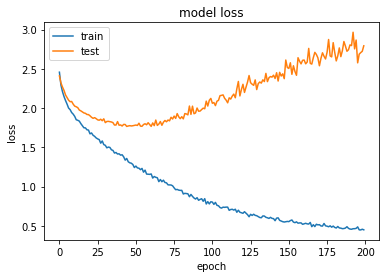

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

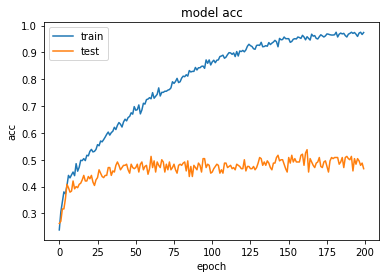

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
model.save('speech_mfcc_model.h5')
model.save_weights('speech_mfcc_model_weight.h5')

In [7]:
#单元测试,载入模型
from keras.models import load_model
import pickle

model=load_model('speech_mfcc_model.h5')

paradict={}
with open('mfcc_model_para_dict.pkl', 'rb') as f:
    paradict=pickle.load(f)

In [8]:
print(paradict['mean'].shape)
print(paradict['std'].shape)
#print(paradict['std'])

DATA_MEAN=paradict['mean']
DATA_STD=paradict['std']
emotionDict=paradict['emotion']

edr = dict([(i, t) for t, i in emotionDict.items()])

(126, 1)
(126, 1)


In [9]:
import librosa

filePath=r'record1.wav'

y,sr = librosa.load(filePath,sr=None)
y=normalizeVoiceLen(y,VOICE_LEN)#归一化长度
mfcc_data=librosa.feature.mfcc(y=y, sr=sr,n_mfcc=13,n_fft=N_FFT,hop_length=int(N_FFT/4))
feature=np.mean(mfcc_data,axis=0)
feature=feature.reshape((126,1))
feature-=DATA_MEAN
feature/=DATA_STD
feature=feature.reshape((1,126,1))

result=model.predict(feature)
index=np.argmax(result, axis=1)[0]

print(edr[index])


fear


In [10]:
y,sr = librosa.load(filePath,sr=None)
step=160
for index in range(step,len(y),step):
    voiceslice=y[index-160:index]
    m=max(voiceslice)
    print(m)
    

0.030426025
0.035125732
0.017120361
0.017822266
0.015319824
0.02319336
0.022766113
0.04208374
0.03036499
0.005126953
0.03652954
0.057617188
0.01864624
-0.0046081543
0.033111572
0.034820557
-0.0021362305
0.020141602
0.02520752
0.02053833
0.013214111
0.0132751465
0.00036621094
0.031188965
0.0390625
0.018371582
0.01828003
0.042755127
0.042541504
0.03781128
0.013916016
0.008758545
0.022888184
0.045959473
0.021057129
0.020233154
0.017578125
0.0025634766
0.025482178
0.028747559
0.032318115
0.031829834
0.040496826
0.031677246
0.022613525
0.017791748
0.08633423
0.048217773
0.017547607
0.014770508
0.030303955
0.042266846
0.018066406
0.013000488
0.013000488
0.015930176
0.032287598
0.023345947
0.013153076
0.017608643
0.03930664
0.043914795
0.02810669
0.0076904297
0.01687622
0.025909424
0.023864746
0.0073547363
0.0036621094
0.02166748
0.021453857
0.024536133
0.032287598
0.025115967
0.009338379
0.015319824
0.0115356445
0.007293701
0.02859497
0.037994385
0.03488159
0.030944824
0.025238037
0.00714111

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os
import wave

#读取音频
f=wave.open(filePath,'rb')
params=f.getparams()
#通道数、采样字节数、采样率、采样帧数
nchannels,sampwidth,framerate,nframes=params[:4]
voiceStrData=f.readframes(nframes)
f.close()


waveData = np.fromstring(voiceStrData,dtype=np.short)

for index in range(step,len(waveData),step):
    voiceslice=waveData[index-160:index]
    m=max(voiceslice)
    print(m)

# 归一化
#waveData = waveData * 1.0/max(abs(waveData))

#将音频信号规整乘每行一路通道信号的格式，即该矩阵一行为一个通道的采样点，共nchannels行
#waveData = np.reshape(waveData,[nframes,nchannels]).T # .T 表示转置


997
1151
561
584
502
760
746
1379
995
168
1197
1888
611
-151
1085
1141
-70
660
826
673
433
435
12
1022
1280
602
599
1401
1394
1239
456
287
750
1506
690
663
576
84
835
942
1059
1043
1327
1038
741
583
2829
1580
575
484
993
1385
592
426
426
522
1058
765
431
577
1288
1439
921
252
553
849
782
241
120
710
703
804
1058
823
306
502
378
239
937
1245
1143
1014
827
234
929
423
-167
528
1681
1634
331
252
857
1163
813
231
458
984
1164
645
681
588
1107
301
-38
715
1300
1317
929
694
667
758
289
106
1397
4078
4787
4670
6536
6447
8216
7179
6981
6832
6133
6442
6955
7346
5931
8381
11837
9553
6157
9142
6133
5573
6538
5739
5464
6965
3771
3529
3763
4022
5039
4080
2469
2736
5093
7700
6744
8055
5967
6344
6189
3185
4774
5695
6778
3460
2520
5017
5261
5039
3553
2940
3204
3740
3721
2819
3452
4926
4882
3822
5757
5741
6277
7103
7490
11419
11771
10999
9739
9112
10785
11449
13477
13261
12673
13465
9267
9226
3584
6077
4879
3121
2729
3110
1674
1626
1015
599
856
1623
1653
956
573
1194
2162
800
743
1361
1733
1204
498
799

E:\Anaconda\envs\ai\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  app.launch_new_instance()
